Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

Using the preprocessed dataset   (preprocessed in the LSTM based model)

In [ ]:
from google.colab import files
data = files.upload()

Saving Final_data.csv to Final_data.csv


In [ ]:
data = pd.read_csv('Final_data.csv')

Encoding the sentiments as "0" or "1"

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
reviews = data['Reviews'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

Tf - idf based preprocessing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

In [ ]:
vectorizer = TfidfVectorizer()
reviews = vectorizer.fit_transform(reviews)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Train- Test split

In [ ]:
train_sents, test_sents, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

GridSearch to find the optimal value for parameter "alpha" for the MultinomialNB() model


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"alpha": [0.2,0.1,1,2,5,10]}

In [ ]:
grid = GridSearchCV(MultinomialNB(), param_grid=parameters)
grid.fit(train_sents,train_labels)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.2, 0.1, 1, 2, 5, 10]})

In [ ]:
pd.DataFrame(grid.cv_results_)[['params','mean_test_score']]\
                               .sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
3,{'alpha': 2},0.864640
2,{'alpha': 1},0.864453
4,{'alpha': 5},0.862347
0,{'alpha': 0.2},0.861600
1,{'alpha': 0.1},0.859307
5,{'alpha': 10},0.856880


In [ ]:
alpha = grid.best_params_['alpha']

Classifier : NAIVE BAYES - MultinomialNB()

In [ ]:
multinb_clf = MultinomialNB(alpha = alpha)   #creating an instance of the class
multinb_clf.fit(train_sents, train_labels)

MultinomialNB(alpha=2)

In [ ]:
pred_probs = multinb_clf.predict_proba(test_sents)

In [ ]:

pred_labels = []
for i in pred_probs[:,1]:
    if i >= 0.5:         #0.5 being the threshold values
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))


Accuracy of prediction on test set :  0.86488


In [ ]:
test_labels

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
pred_labels

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

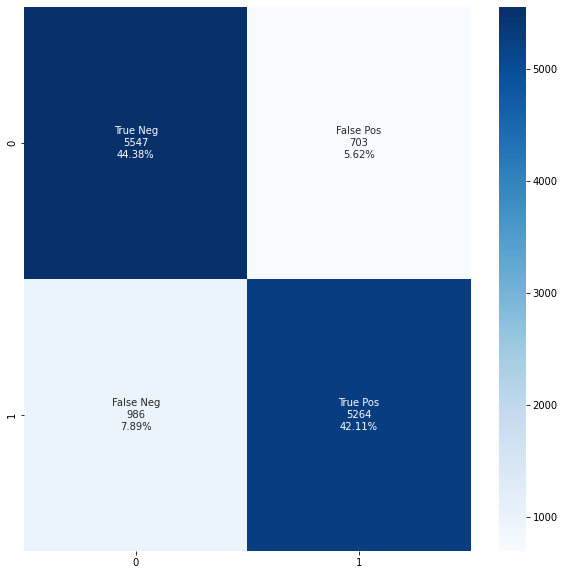

In [ ]:
cf_matrix = confusion_matrix(test_labels, pred_labels)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)


sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import f1_score
f1_score(test_labels,pred_labels)

0.8617500204632889

In [ ]:
classification_report(test_labels,pred_labels)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87      6250\n           1       0.88      0.84      0.86      6250\n\n    accuracy                           0.86     12500\n   macro avg       0.87      0.86      0.86     12500\nweighted avg       0.87      0.86      0.86     12500\n'

In [ ]:
"""
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      6250
           1       0.88      0.85      0.86      6250

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500


"""

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(test_labels, pred_labels)

0.8648799999999999